In [1]:
import numpy as np
import pandas as pd

import sklearn.neighbors as neighbors

from importlib import reload
import copy
import synthetic.render.generator as gen

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import multiprocessing as mp

import sys
import os
import math
import logging
import time
import galsim
import fitsio as fio

import ngmix

import synthetic.render.render as render
import synthetic.render.icl as icl
import synthetic.render.frame as frame

import images
import meds
import subprocess
import psfex

In [2]:
catalogs = []
catalog_tag = '/e/ocean1/users/vargatn/DES/SIM_DATA/SKY_MODEL_EPSILON/res_clust_v2_z0l0/epsilon_clust_v8-z0l0_15000_{:03d}.fits'
for i in np.arange(1):
    fname = catalog_tag.format(i)
    data = fio.read(fname)
    catalog_cluster = data[data['LOC'] == 1]
    catalog_field = data[data['LOC'] == 0]
    catalog = np.hstack((catalog_cluster, catalog_field))
    catalog['G1'] = 0.1
    catalog['G2'] = -0.1
    catalogs.append(catalog)

In [3]:
x = np.linspace(201, 4700, 20) + 2500
y = np.linspace(201, 4700, 20) + 2500
xx, yy = np.meshgrid(x, y)
xx = xx.flatten()
yy = yy.flatten()

In [4]:
star_catalog = copy.deepcopy(catalog[:400])
star_catalog[:] = 0
mag = 30  - 2.5 * np.log10(5e4)

In [5]:
star_catalog["X"] = xx 
star_catalog["Y"] = yy
star_catalog["FLUX_G"][:] = 5e4
star_catalog["FLUX_R"][:] = 5e4
star_catalog["FLUX_I"][:] = 5e4
star_catalog["FLUX_Z"][:] = 5e4
star_catalog["TSIZE"][:] = 0
star_catalog["MAG_G"][:] = mag
star_catalog["MAG_R"][:] = mag
star_catalog["MAG_I"][:] = mag
star_catalog["MAG_Z"][:] = mag
star_catalog["FRACDEV"][:] = mag


In [29]:
name = 'star_canvas'
print(name)
fr = frame.Frame(star_catalog, name=name, noise_std=0.1)
fr.render(nprocess=100)
fr.extract()

star_canvas
starting postage stamp calculations in 100 processes
sex star_canvas.fits -c config.sex -CATALOG_NAME star_canvas_cat.fits -CHECKIMAGE_NAME star_canvas_seg.fits


In [30]:
! sex star_canvas.fits -c config.sex -CATALOG_TYPE FITS_LDAC -CATALOG_NAME star_canvas_cat.ldac -CHECKIMAGE_NAME star_canvas_000_seg.ldac

> 
----- SExtractor 2.25.0 started on 2023-02-27 at 17:55:54 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for star_canvas.fits
----- Measuring from: star_canvas.fits
      "Unnamed" / no ext. header / 5000x5000 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
> Setting up background map at line:  832
> Setting up b

> Line: 2025  Objects:        0 detected /        0 sextracted
> Line: 2050  Objects:        0 detected /        0 sextracted
> Line: 2075  Objects:        0 detected /        0 sextracted
> Line: 2100  Objects:        0 detected /        0 sextracted
> Line: 2125  Objects:        0 detected /        0 sextracted
> Line: 2150  Objects:        0 detected /        0 sextracted
> Line: 2175  Objects:        0 detected /        0 sextracted
> Line: 2200  Objects:        0 detected /        0 sextracted
> Line: 2225  Objects:        0 detected /        0 sextracted
> Line: 2250  Objects:        0 detected /        0 sextracted
> Line: 2275  Objects:        0 detected /        0 sextracted
> Line: 2300  Objects:        0 detected /        0 sextracted
> Line: 2325  Objects:        0 detected /        0 sextracted
> Line: 2350  Objects:        0 detected /        0 sextracted
> Line: 2375  Objects:        0 detected /        0 sextracted
> Line: 2400  Objects:        0 detected /        0 sex

      Objects: detected 100      / sextracted 100             

> Closing files
> 
> All done (in 1.4 s: 3576.4 lines/s , 71.5 detections/s)


In [31]:
fr.scat["FWHM_WORLD"].mean()

0.000329749

In [32]:
fr.scat['SNR_WIN'].mean()

74072.555

In [33]:
fr.scat["VIGNET"].max()

2129.8757

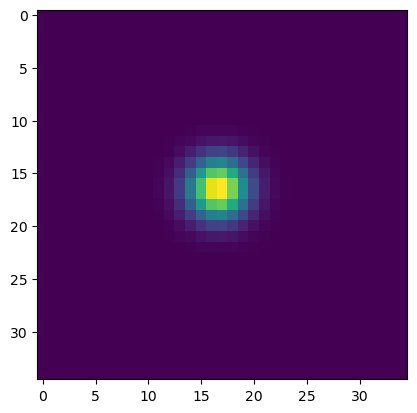

In [34]:
plt.imshow(fr.scat["VIGNET"][5])

In [35]:
!psfex star_canvas_cat.ldac -c psfex.config


> WARNING: This executable has been compiled using a version of the ATLAS library without support for multithreading. Performance will be degraded.

.
----- PSFEx 3.21.1 started on 2023-02-27 at 17:55:59 with 160 threads

.
----- 1 input catalogues:
star_canvas_cat.ldac:  "no ident        "    1 extension     100 detections

Initializing contexts....
Computing optimum PSF sampling steps....
Reading data from star_canvas_cat....
Computing final PSF model for star_canvas_cat....
Computing diagnostics for star_canvas_cat....
star_canvas_cat            100/100     0.98   3.68   4.39  0.00  0.02  0.40
Saving CHECK-image #1....
Saving CHECK-image #2....
Saving CHECK-image #3....
Saving CHECK-image #4....
Saving CHECK-image #5....
Saving PSF model and metadata for star_canvas_cat....
Writing XML file....
.


In [36]:
fio.read_header("star_canvas_cat.psf", ext=1)


XTENSION= 'BINTABLE'           / THIS IS A BINARY TABLE (FROM THE LDACTOOLS)
BITPIX  =                    8 / 
NAXIS   =                    2 / 
NAXIS1  =                36000 / BYTES PER ROW
NAXIS2  =                    1 / NUMBER OF ROWS
PCOUNT  =                    0 / RANDOM PARAMETER COUNT
GCOUNT  =                    1 / GROUP COUNT
TFIELDS =                    1 / FIELDS PER ROWS
EXTNAME = 'PSF_DATA'           / TABLE NAME
LOADED  =                  100 / Number of loaded sources
ACCEPTED=                  100 / Number of accepted sources
CHI2    =           3.67515858 / Final reduced chi2
POLNAXIS=                    2 / Number of context parameters
POLGRP1 =                    1 / Polynom group for this context parameter
POLNAME1= 'X_IMAGE'            / Name of this context parameter
POLZERO1=       3767.052612305 / Offset value for this context parameter
POLSCAL1=       2131.105712891 / Scale value for this context parameter
POLGRP2 =                    1 / Polynom group for

In [40]:
import psfex

row=514.25
col=1610.00


pex = psfex.PSFEx("star_canvas_cat.psf")
image = pex.get_rec(row, col)

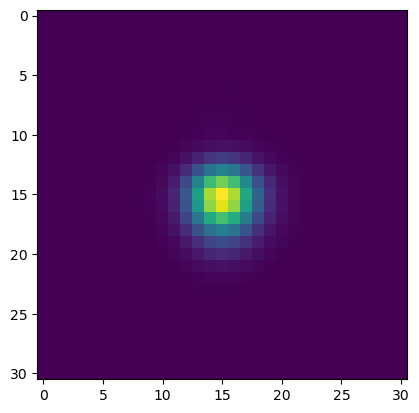

In [41]:
plt.imshow(image)

# Making MEDS

In [39]:

i = 0
name = 'canvas_{:03d}'.format(i)
print(name)
fr = frame.Frame(catalog, name=name, noise_std=4)
fr.render()
fr.extract()

canvas_000
starting postage stamp calculations in 1 processes
sex canvas_000.fits -c config.sex -CATALOG_NAME canvas_000_cat.fits -CHECKIMAGE_NAME canvas_000_seg.fits


In [21]:
fr.scat.dtype

dtype([('ALPHAWIN_J2000', '>f8'), ('DELTAWIN_J2000', '>f8'), ('X_IMAGE', '>f4'), ('Y_IMAGE', '>f4'), ('NUMBER', '>i4'), ('MAG_ISO', '>f4'), ('MAGERR_ISO', '>f4'), ('MAG_ISOCOR', '>f4'), ('MAGERR_ISOCOR', '>f4'), ('MAG_APER', '>f4'), ('MAGERR_APER', '>f4'), ('MAG_AUTO', '>f4'), ('MAGERR_AUTO', '>f4'), ('MAG_BEST', '>f4'), ('MAGERR_BEST', '>f4'), ('FLUX_AUTO', '>f4'), ('FLUXERR_AUTO', '>f4'), ('FLUX_BEST', '>f4'), ('FLUXERR_BEST', '>f4'), ('FLUX_ISO', '>f4'), ('FLUXERR_ISO', '>f4'), ('KRON_RADIUS', '>f4'), ('BACKGROUND', '>f4'), ('THRESHOLD', '>f4'), ('FLUX_MAX', '>f4'), ('ISOAREA_IMAGE', '>i4'), ('X2_IMAGE', '>f8'), ('Y2_IMAGE', '>f8'), ('XY_IMAGE', '>f8'), ('YMIN_IMAGE', '>i4'), ('YMAX_IMAGE', '>i4'), ('XMIN_IMAGE', '>i4'), ('XMAX_IMAGE', '>i4'), ('A_IMAGE', '>f4'), ('B_IMAGE', '>f4'), ('THETA_IMAGE', '>f4'), ('MU_THRESHOLD', '>f4'), ('MU_MAX', '>f4'), ('ISOAREA_WORLD', '>f4'), ('X_WORLD', '>f8'), ('Y_WORLD', '>f8'), ('A_WORLD', '>f4'), ('B_WORLD', '>f4'), ('THETA_WORLD', '>f4'), ('FLA

In [23]:
dec = fr.scat["DELTAWIN_J2000"]
ra = fr.scat['ALPHAWIN_J2000']

In [27]:
nobj = len(fr.scat)

In [70]:
fr.scat["X_IMAGE"]

array([2510.5696, 2474.3804, 2517.8147, ..., 1219.1913, 1973.8927,
       3513.0195], dtype=float32)

In [79]:
nimage = 1

obj_data = meds.util.get_meds_input_struct(nobj, extra_fields=[("X_IMAGE", "f8"), ("Y_IMAGE", "f8")])
obj_data['id'] = fr.scat['NUMBER']
obj_data['box_size'] = np.ones(nobj) * 16
obj_data['ra'] = fr.scat['ALPHAWIN_J2000']
obj_data['dec'] = fr.scat['DELTAWIN_J2000']
obj_data['X_IMAGE'] = fr.scat['X_IMAGE']
obj_data['Y_IMAGE'] = fr.scat['Y_IMAGE']

In [80]:
image_info= meds.util.get_image_info_struct(nimage, 21)

In [81]:

image_info['image_path'][0] = './canvas_000.fits'
image_info['weight_path'][0] = './canvas_weight.fits' 
image_info['seg_path'][0] = './canvas_000_seg.fits'
image_info['magzp'] = 30.

config = {'first_image_is_coadd': False,'cutout_types':['weight','seg'],'psf_type':'psfex'}

In [82]:
psf_data = [pex,]

In [83]:
mm = meds.MEDSMaker(obj_data=obj_data, image_info=image_info, config=config, psf_data=psf_data)

writing cutouts for: ['image', 'weight', 'seg']


In [84]:
mm.write("testmeds.fits")

file    1 of    1: 'b'./canvas_000.fits''
    first cut:    9323 of   9323 objects
    second cut:   9323 of   9323 objects
9323/9323 had ncut > 0
setting start rows and pixel count
total pixels: 2386688
setting psf layout for PSFEx
meds layout build time: 0.246745 seconds
opening output MEDS file: 'testmeds.fits'
writing object_data


/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.7/site-packages/meds/util.py:380: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  phat = numpy.array([-1.0*sinp,cosp,0.0]).T


writing image_info
writing metadata
    reserving image mosaic
    reserving weight mosaic
    reserving seg mosaic
    reserving psf mosaic
writing image cutouts
    1/1 image b'./canvas_000.fits'
    no background for image
writing weight cutouts
    1/1 weight b'./canvas_weight.fits'
writing seg cutouts
    1/1 seg b'./canvas_000_seg.fits'
writing psf cutouts
output is in: testmeds.fits


In [57]:
m = meds.MEDS('testmeds.fits')

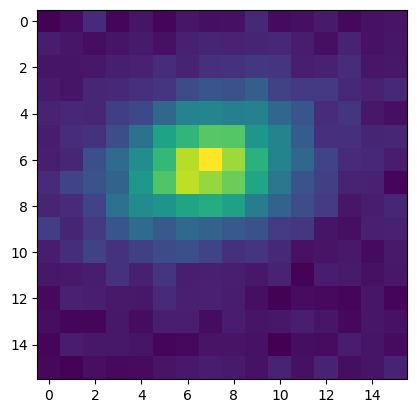

In [67]:
im = m.get_cutout(321, 0, 'image')
plt.imshow(im)

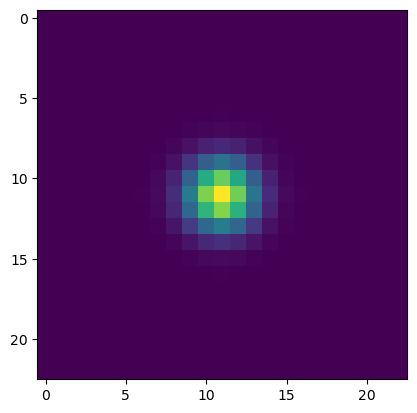

In [61]:

plt.imshow(im)